In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

media = [
    'NachDenkSeiten', 
    'taz', 
    'DER SPIEGEL', 
    'ARD', 
    'ZDF', 
    'Bayerischer Rundfunk', 
    'ntv Nachrichten', 
    'faz', 
    'WELT', 
    'BILD', 
    'COMPACTTV'
    ]
parties = [
    'linke',
    'grüne',
    'spd',
    'fdp',
    'cdu',
    'csu',
    'afd'
    ]
btw17 = {
    'linke': 69,
    'grüne': 67,
    'spd': 153,
    'fdp': 80,
    'cdu_csu': 246,
    'afd': 94,
}
btw21 = {
    'linke': 39,
    'grüne': 118,
    'spd': 206,
    'fdp': 92,
    'cdu_csu': 197,
    'afd': 83,
}

In [2]:
def a_pivot_df_medium_vs_party(input_df):
    output_df = pd.pivot_table(input_df, index='medium', columns='party', values='title', aggfunc='count', fill_value=0)
    return output_df

def b_sort_df_by_political_ideology(input_df):
    output_df = input_df.reindex(media)[parties]
    return output_df

def c_standardize_df_by_row_sum(input_df):
    output_df = input_df.div(input_df.sum(axis=1), axis=0)
    return output_df

def d_subtract_df_column_means(input_df):
    output_df = input_df - input_df.mean()
    return output_df
    
def e_heatmap_plot_df(input_df):
    f, ax = plt.subplots(figsize=(9, 8))
    f.subplots_adjust(left=0.15, bottom=.13, right=.99, top=.89)
    sns.heatmap(input_df, annot=True, linewidths=.5, ax=ax, fmt=".1%", center=np.nanmean(input_df), cbar=False, cmap=sns.diverging_palette(145, 20, as_cmap=True).reversed())
    return

def f_saveplot_mentions_short(df, title, path, n_rows_in_title=1):
    from pathlib import Path
    import matplotlib as mpl
    import matplotlib.font_manager as fm
    import matplotlib.pyplot as plt
    mpl.use('pdf')

    fpath = Path(mpl.get_data_path(), "fonts/ttf/cmu_serif_roman.ttf")
    fprop = fm.FontProperties(fname=fpath)

    width = 6.2 #inches
    height = width

    font = {'family':'serif', 'serif': ['cmr10'], 'size':12}
    plt.rc('font',**font)
    plt.rcParams['axes.unicode_minus'] = False
    plt.rc('axes', titlesize=12)
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=12)


    f, ax = plt.subplots(figsize=(9, 8))
    if n_rows_in_title==1:
        f.subplots_adjust(left=0.14, bottom=.15, right=.96, top=.93)
    elif n_rows_in_title==2:
        f.subplots_adjust(left=0.14, bottom=.15, right=.99, top=.88)
    else:
        return
    
    df_to_plot = df.copy()
    sns.heatmap(df_to_plot, annot=True, linewidths=.5, ax=ax, fmt=".1%", center=np.nanmean(df_to_plot), cbar=False, cmap=sns.diverging_palette(145, 20, as_cmap=True).reversed())

    ax.set_xlabel('Party', fontsize=12, font=fpath, color='black')
    ax.set_ylabel('Medium', fontsize=12, font=fpath, color='black')
    ax.set_title(title, fontsize=12, font=fpath, color='black')
    ax.set_xticklabels(['Linke', 'Grüne', 'SPD', 'FDP', 'CDU', 'CSU', 'AfD'], size=12, font=fpath, color='black')
    ax.set_yticklabels(['NDS', 'taz', 'Sp', 'ARD', 'ZDF', 'BR', 'ntv', 'faz', 'WELT', 'BILD', 'CTV'], size=12, font=fpath, color='black')

    f.set_size_inches(width, height*11/21)
    f.savefig(path)
    return

def g_saveplot_mentions_per_seat(df, title, path, n_rows_in_title=1):
    from pathlib import Path
    import matplotlib as mpl
    import matplotlib.font_manager as fm
    import matplotlib.pyplot as plt
    mpl.use('pdf')

    fpath = Path(mpl.get_data_path(), "fonts/ttf/cmu_serif_roman.ttf")
    fprop = fm.FontProperties(fname=fpath)

    width = 6.2 #inches
    height = width

    font = {'family':'serif', 'serif': ['cmr10'], 'size':12}
    plt.rc('font',**font)
    plt.rcParams['axes.unicode_minus'] = False
    plt.rc('axes', titlesize=12)
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=12)


    f, ax = plt.subplots(figsize=(9, 8))
    if n_rows_in_title==1:
        f.subplots_adjust(left=0.14, bottom=.15, right=.96, top=.93)
    elif n_rows_in_title==2:
        f.subplots_adjust(left=0.14, bottom=.15, right=.99, top=.88)
    else:
        return
    
    df_to_plot = df.copy()
    sns.heatmap(df_to_plot, annot=True, linewidths=.5, ax=ax, fmt=".2g", center=np.nanmean(df_to_plot), cbar=False, cmap=sns.diverging_palette(145, 20, as_cmap=True).reversed())

    ax.set_xlabel('Party', fontsize=12, font=fpath, color='black')
    ax.set_ylabel('Medium', fontsize=12, font=fpath, color='black')
    ax.set_title(title, fontsize=12, font=fpath, color='black')
    ax.set_xticklabels(['Linke', 'Grüne', 'SPD', 'FDP', 'CDU/CSU', 'AfD'], size=12, font=fpath, color='black')
    ax.set_yticklabels(['NDS', 'taz', 'Sp', 'ARD', 'ZDF', 'BR', 'ntv', 'faz', 'WELT', 'BILD', 'CTV'], size=12, font=fpath, color='black')

    f.set_size_inches(width, height*11/21)
    f.savefig(path)
    return


In [3]:
unique_party_df = pd.read_pickle('../data/mentions/party_mentions_unique.pkl')
unique_party_df.head()

,search_term,medium,id,title,date,party,mention_count
0,afd,ARD,0RQL6V9LyBE,Steuer: Vorteile für rechtsradikale Vereine | ...,2019-03-29,afd,1
1,afd,ARD,0r1wYde5g1Y,"""Gefällt mir"": Das Geschäft mit den gekauften ...",2019-12-22,afd,6
2,afd,ARD,2BjPik6lHZg,Wie Fake-News Politik und Wahlen beeinflussen,2016-11-30,afd,4
3,afd,ARD,2dhFfUybtaw,Gefährliche Ideologie: Völkisches Netzwerk im ...,2019-04-17,afd,1
4,afd,ARD,54tyg19NCxw,Der Traum vom Umsturz - Neonazis und die Wende...,2020-09-03,afd,2


In [4]:
unique_party_mentions_2017_by_party_df = a_pivot_df_medium_vs_party(unique_party_df[(unique_party_df.date.dt.year > 2017) & (unique_party_df.date.dt.year < 2021)])
unique_party_mentions_2021_by_party_df = a_pivot_df_medium_vs_party(unique_party_df[unique_party_df.date.dt.year > 2021])
unique_party_mentions_by_party_df = a_pivot_df_medium_vs_party(unique_party_df)
unique_party_mentions_by_party_df

party,afd,cdu,csu,fdp,grüne,linke,spd,trump
medium,,,,,,,,
ARD,76,135,56,103,90,41,144,41
BILD,514,1137,578,1018,565,310,1206,736
Bayerischer Rundfunk,34,43,102,48,81,49,95,56
COMPACTTV,435,224,87,228,140,159,226,95
DER SPIEGEL,335,371,203,270,191,123,415,254
NachDenkSeiten,233,344,181,192,113,233,451,192
WELT,603,1482,868,1457,906,483,1750,886
ZDF,908,1121,597,1060,711,514,1302,557
faz,378,562,225,411,237,155,608,794


In [5]:
ordered_unique_party_mentions_2017_by_party_df = b_sort_df_by_political_ideology(unique_party_mentions_2017_by_party_df)
ordered_unique_party_mentions_2021_by_party_df = b_sort_df_by_political_ideology(unique_party_mentions_2021_by_party_df)
ordered_unique_party_mentions_by_party = b_sort_df_by_political_ideology(unique_party_mentions_by_party_df)
ordered_unique_party_mentions_by_party

party,linke,grüne,spd,fdp,cdu,csu,afd
medium,,,,,,,
NachDenkSeiten,233,113,451,192,344,181,233
taz,127,109,129,112,132,55,142
DER SPIEGEL,123,191,415,270,371,203,335
ARD,41,90,144,103,135,56,76
ZDF,514,711,1302,1060,1121,597,908
Bayerischer Rundfunk,49,81,95,48,43,102,34
ntv Nachrichten,141,227,448,339,389,239,242
faz,155,237,608,411,562,225,378
WELT,483,906,1750,1457,1482,868,603


In [6]:
proportion_unique_party_mentions_2017_by_party_df = c_standardize_df_by_row_sum(ordered_unique_party_mentions_2017_by_party_df)
proportion_unique_party_mentions_2021_by_party_df = c_standardize_df_by_row_sum(ordered_unique_party_mentions_2021_by_party_df)
proportion_unique_party_mentions_by_party_df = c_standardize_df_by_row_sum(ordered_unique_party_mentions_by_party)
proportion_unique_party_mentions_by_party_df

party,linke,grüne,spd,fdp,cdu,csu,afd
medium,,,,,,,
NachDenkSeiten,0.133371,0.064682,0.258157,0.109903,0.196909,0.103606,0.133371
taz,0.157568,0.135236,0.160050,0.138958,0.163772,0.068238,0.176179
DER SPIEGEL,0.064465,0.100105,0.217505,0.141509,0.194444,0.106394,0.175577
ARD,0.063566,0.139535,0.223256,0.159690,0.209302,0.086822,0.117829
ZDF,0.082730,0.114437,0.209561,0.170610,0.180428,0.096089,0.146145
Bayerischer Rundfunk,0.108407,0.179204,0.210177,0.106195,0.095133,0.225664,0.075221
ntv Nachrichten,0.069630,0.112099,0.221235,0.167407,0.192099,0.118025,0.119506
faz,0.060171,0.092003,0.236025,0.159550,0.218168,0.087345,0.146739
WELT,0.063982,0.120016,0.231819,0.193006,0.196317,0.114982,0.079878


In [7]:
ordered_unique_party_mentions_2017_by_party_df

party,linke,grüne,spd,fdp,cdu,csu,afd
medium,,,,,,,
NachDenkSeiten,180,81,335,138,264,139,206
taz,62,55,71,50,68,31,88
DER SPIEGEL,49,69,174,85,153,100,154
ARD,7,16,22,8,27,8,25
ZDF,145,148,352,239,292,135,363
Bayerischer Rundfunk,22,37,38,20,19,48,13
ntv Nachrichten,72,103,222,138,198,108,156
faz,85,113,337,176,318,130,262
WELT,89,142,342,248,332,176,162


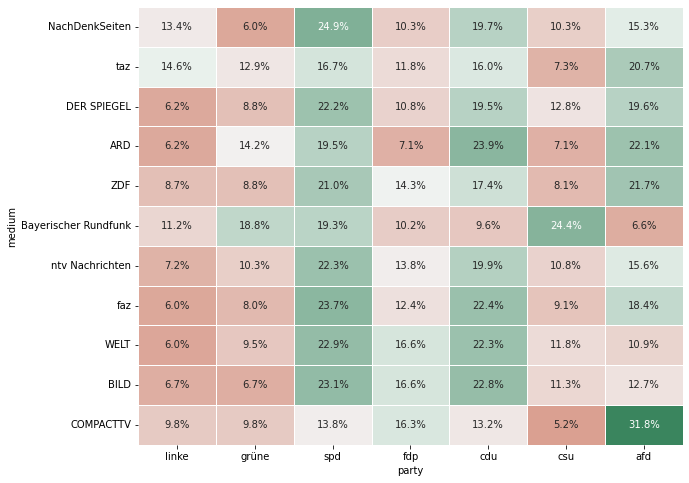

In [8]:
e_heatmap_plot_df(proportion_unique_party_mentions_2017_by_party_df)

In [9]:
ordered_unique_party_mentions_2021_by_party_df

party,linke,grüne,spd,fdp,cdu,csu,afd
medium,,,,,,,
NachDenkSeiten,10,8,28,12,11,7,8
taz,14,6,11,8,8,5,8
DER SPIEGEL,12,23,30,35,30,17,18
ARD,9,36,58,46,49,14,15
ZDF,116,166,318,266,255,139,148
Bayerischer Rundfunk,4,4,4,3,1,3,2
ntv Nachrichten,16,26,54,50,52,35,11
faz,18,35,84,75,60,20,44
WELT,140,240,428,434,368,224,174


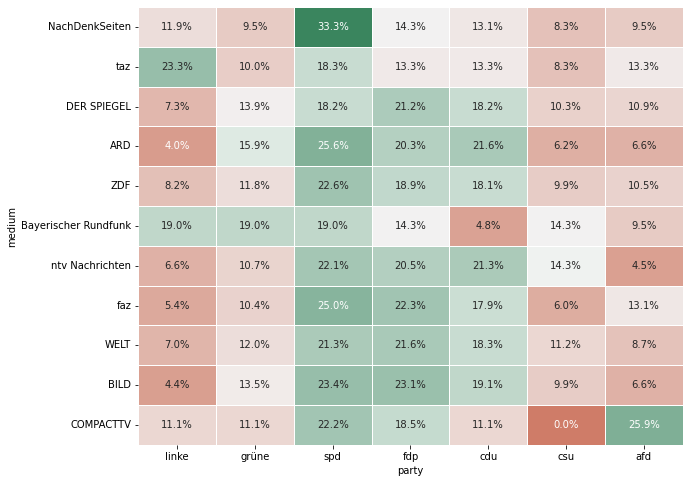

In [10]:
e_heatmap_plot_df(proportion_unique_party_mentions_2021_by_party_df)

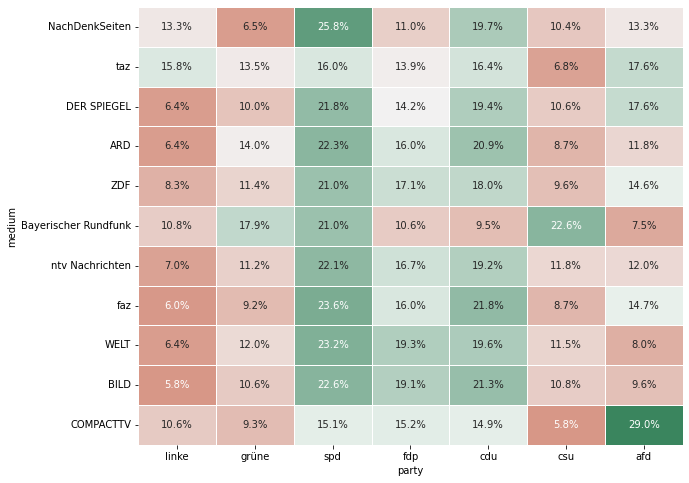

In [11]:
e_heatmap_plot_df(proportion_unique_party_mentions_by_party_df)

In [12]:
deviations_unique_party_mentions_2017_by_party_df = d_subtract_df_column_means(proportion_unique_party_mentions_2017_by_party_df)
deviations_unique_party_mentions_2021_by_party_df = d_subtract_df_column_means(proportion_unique_party_mentions_2021_by_party_df)
deviations_unique_party_mentions_by_party_df = d_subtract_df_column_means(proportion_unique_party_mentions_by_party_df)
deviations_unique_party_mentions_by_party_df

party,linke,grüne,spd,fdp,cdu,csu,afd
medium,,,,,,,
NachDenkSeiten,0.045358,-0.049568,0.044984,-0.043733,0.014236,-0.003093,-0.008184
taz,0.069555,0.020985,-0.053123,-0.014678,-0.018902,-0.038461,0.034623
DER SPIEGEL,-0.023548,-0.014146,0.004332,-0.012126,0.011771,-0.000305,0.034021
ARD,-0.024447,0.025284,0.010083,0.006054,0.026629,-0.019877,-0.023726
ZDF,-0.005283,0.000187,-0.003612,0.016974,-0.002245,-0.010610,0.004590
Bayerischer Rundfunk,0.020394,0.064953,-0.002996,-0.047441,-0.087541,0.118965,-0.066334
ntv Nachrichten,-0.018383,-0.002152,0.008062,0.013772,0.009425,0.011326,-0.022049
faz,-0.027842,-0.022247,0.022852,0.005914,0.035494,-0.019354,0.005184
WELT,-0.024031,0.005765,0.018646,0.039370,0.013644,0.008283,-0.061677


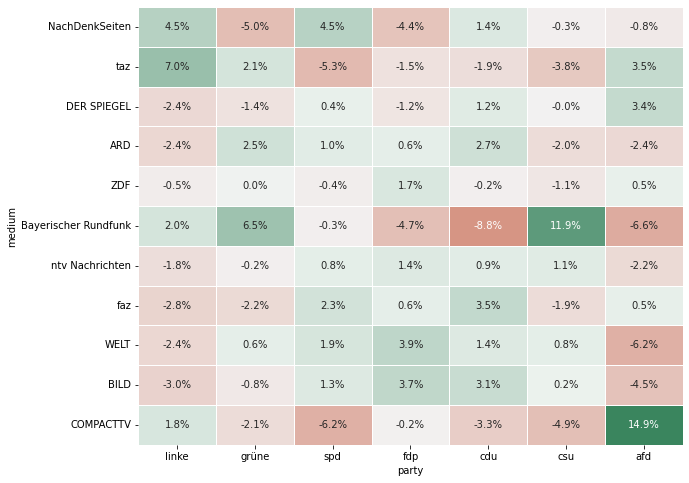

In [13]:
e_heatmap_plot_df(deviations_unique_party_mentions_by_party_df)

/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_88697/996318384.py:44: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/Users/hs/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.draw()
/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_88697/996318384.py:44: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/Users/hs/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.draw()


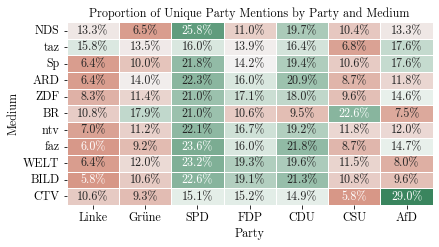

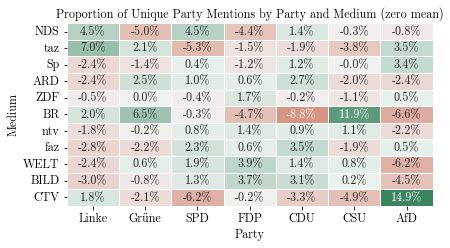

In [14]:
f_saveplot_mentions_short(df=proportion_unique_party_mentions_by_party_df, title='Proportion of Unique Party Mentions by Party and Medium', path='../results/englisch/erwähnungen_partei_gekuerzt_einzigartig.pdf')
f_saveplot_mentions_short(df=deviations_unique_party_mentions_by_party_df, title='Proportion of Unique Party Mentions by Party and Medium (zero mean)', path='../results/englisch/erwähnungen_partei_gekuerzt_mittelwertfrei_einzigartig.pdf', n_rows_in_title=1)

In [15]:
unique_party_mentions_2017 = ordered_unique_party_mentions_2017_by_party_df.copy()

unique_party_mentions_2017['cdu_csu'] = unique_party_mentions_2017['cdu'] + unique_party_mentions_2017['csu']
unique_party_mentions_2017.drop(columns=['cdu', 'csu'], inplace=True)
unique_party_mentions_2017 = unique_party_mentions_2017[['linke', 'grüne', 'spd', 'fdp', 'cdu_csu', 'afd']]

/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_88697/438452094.py:7: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/Users/hs/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.draw()


Text(0.5, 1.0, 'unique party mentions pro sitz im bundestag 2017, standardisiert auf afd')

/Users/hs/miniforge3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


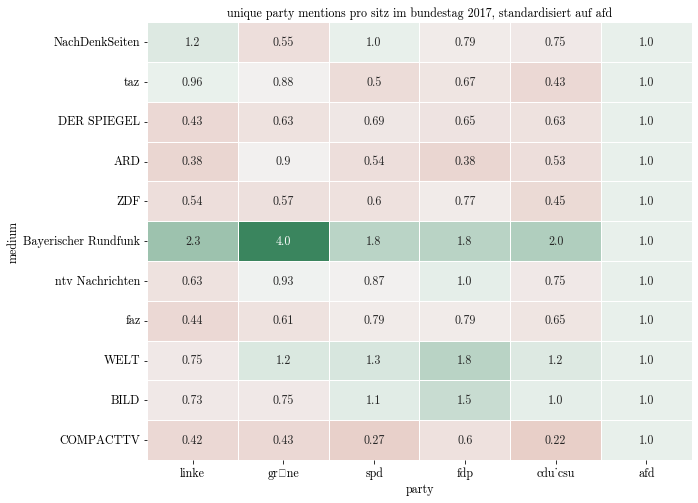

In [16]:
unique_party_mentions_17 = unique_party_mentions_2017.copy()
for party in btw17.keys():
    unique_party_mentions_17[party] /= btw17[party]

unique_party_mentions_17_standardized = unique_party_mentions_17.div(unique_party_mentions_17['afd'], axis=0)

f, ax = plt.subplots(figsize=(9, 8))
f.subplots_adjust(left=0.15, bottom=.13, right=.99, top=.89)
sns.heatmap(unique_party_mentions_17_standardized, annot=True, linewidths=.5, ax=ax, fmt="1.2", center=np.nanmean(unique_party_mentions_17_standardized), cbar=False, cmap=sns.diverging_palette(145, 20, as_cmap=True).reversed())
plt.title('unique party mentions pro sitz im bundestag 2017, standardisiert auf afd')

In [17]:
unique_party_mentions_2021 = ordered_unique_party_mentions_2021_by_party_df.copy()

unique_party_mentions_2021['cdu_csu'] = unique_party_mentions_2021['cdu'] + unique_party_mentions_2021['csu']
unique_party_mentions_2021.drop(columns=['cdu', 'csu'], inplace=True)
unique_party_mentions_2021 = unique_party_mentions_2021[['linke', 'grüne', 'spd', 'fdp', 'cdu_csu', 'afd']]

/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_88697/3977592203.py:7: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/Users/hs/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.draw()


Text(0.5, 1.0, 'unique party mentions pro sitz im bundestag 2021, standardisiert auf afd')

/Users/hs/miniforge3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


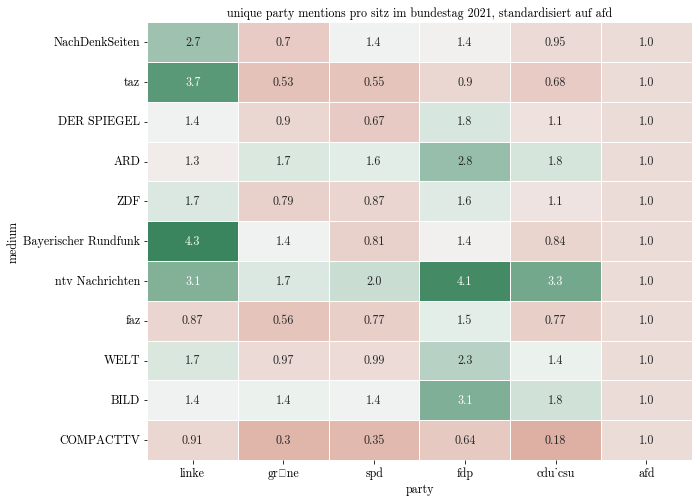

In [18]:
unique_party_mentions_21 = unique_party_mentions_2021.copy()
for party in btw21.keys():
    unique_party_mentions_21[party] /= btw21[party]

unique_party_mentions_21_standardized = unique_party_mentions_21.div(unique_party_mentions_21['afd'], axis=0).replace([np.inf, -np.inf], np.nan).dropna()

f, ax = plt.subplots(figsize=(9, 8))
f.subplots_adjust(left=0.15, bottom=.13, right=.99, top=.89)
sns.heatmap(unique_party_mentions_21_standardized, annot=True, linewidths=.5, ax=ax, fmt="1.2", center=np.nanmean(unique_party_mentions_21_standardized), cbar=False, cmap=sns.diverging_palette(145, 20, as_cmap=True).reversed())
plt.title('unique party mentions pro sitz im bundestag 2021, standardisiert auf afd')

/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_88697/996318384.py:86: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_88697/996318384.py:86: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/Users/hs/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.draw()


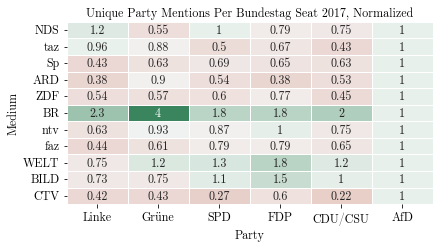

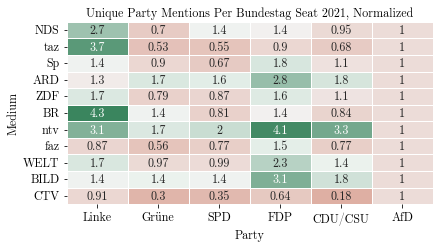

In [19]:
g_saveplot_mentions_per_seat(df=unique_party_mentions_17_standardized, title='Unique Party Mentions Per Bundestag Seat 2017, Normalized', path='../results/englisch/erwähnungen_partei_gekuerzt_einzigartig_pro_sitz_2017.pdf')
g_saveplot_mentions_per_seat(df=unique_party_mentions_21_standardized, title='Unique Party Mentions Per Bundestag Seat 2021, Normalized', path='../results/englisch/erwähnungen_partei_gekuerzt_einzigartig_pro_sitz_2021.pdf')

/Users/hs/miniforge3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:387: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  axes = fig.add_subplot(111)


Text(0.5, 1.0, 'durchschnitt aller medien (ausgenommen extreme), unique party mentions pro sitz im bundestag, standardisiert auf afd\nblau 2017, orange 2021')

/Users/hs/miniforge3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


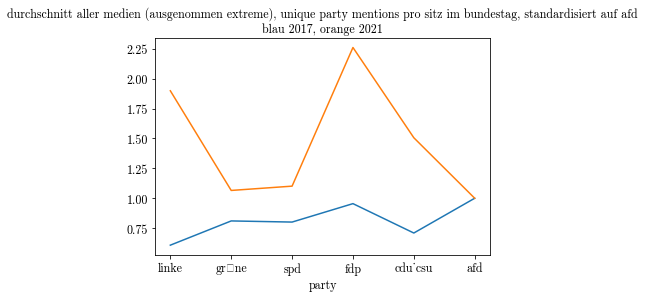

In [20]:
unique_party_mentions_17_standardized.drop(['NachDenkSeiten', 'Bayerischer Rundfunk', 'COMPACTTV']).mean().plot()
unique_party_mentions_21_standardized.drop(['NachDenkSeiten', 'Bayerischer Rundfunk', 'COMPACTTV']).mean().plot()
plt.title('durchschnitt aller medien (ausgenommen extreme), unique party mentions pro sitz im bundestag, standardisiert auf afd\nblau 2017, orange 2021')

In [21]:
unique_lineplot_df = pd.DataFrame()
unique_lineplot_df['2017'] = unique_party_mentions_17_standardized.drop(['NachDenkSeiten', 'Bayerischer Rundfunk', 'COMPACTTV']).mean()
unique_lineplot_df['2021'] = unique_party_mentions_21_standardized.drop(['NachDenkSeiten', 'Bayerischer Rundfunk', 'COMPACTTV']).mean()
unique_lineplot_df = unique_lineplot_df.T
unique_lineplot_df['year'] = unique_lineplot_df.index
unique_lineplot_df = pd.melt(unique_lineplot_df, id_vars=['year'], value_vars=['linke', 'grüne', 'spd', 'fdp', 'cdu_csu', 'afd'])
unique_lineplot_df.columns = ['Year', 'party', 'value']
unique_lineplot_df.to_pickle('../data/mentions/lineplot_unique_party.pkl')